In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader,sampler,Dataset
import torchvision.datasets as dset
import torchvision.transforms as T
import timeit
from PIL import Image
import os
import numpy as np
import scipy.io
#plotting and visualization library
import matplotlib.pyplot as plt
#Display on the notebook
%matplotlib inline
plt.ion() #Turn interactive mode on.
import torch.nn.functional as F

In [ ]:
!mkdir lab5_data
!gdown -O lab5_data.zip "https://drive.google.com/u/0/uc?id=1TfIZpYW0Fbcg-ldTS9N7hs4cF2nnIOK9"
!unzip lab5_data.zip -d lab5_data/

Downloading...
From: https://drive.google.com/u/0/uc?id=1TfIZpYW0Fbcg-ldTS9N7hs4cF2nnIOK9
To: /content/lab5_data.zip
100% 106M/106M [00:02<00:00, 37.2MB/s]
Archive:  lab5_data.zip
   creating: lab5_data/catch/
  inflating: lab5_data/catch/96-_Torwarttraining_1_catch_f_cm_np1_le_bad_0.avi  
  inflating: lab5_data/catch/Ballfangen_catch_u_cm_np1_fr_goo_0.avi  
  inflating: lab5_data/catch/Ballfangen_catch_u_cm_np1_fr_goo_1.avi  
  inflating: lab5_data/catch/Ballfangen_catch_u_cm_np1_fr_goo_2.avi  
  inflating: lab5_data/catch/Ball_hochwerfen_-_Rolle_-_Ball_fangen_(Timo_3)_catch_f_cm_np1_le_goo_0.avi  
  inflating: lab5_data/catch/Ball_hochwerfen_-_Rolle_-_Ball_fangen_(Timo_3)_catch_f_cm_np1_ri_med_1.avi  
  inflating: lab5_data/catch/Behinderten_Sport_part_2_catch_f_cm_np1_fr_bad_0.avi  
  inflating: lab5_data/catch/Behinderten_Sport_part_2_catch_f_cm_np1_ri_bad_1.avi  
  inflating: lab5_data/catch/Faith_Rewarded_catch_f_cm_np1_fr_med_10.avi  
  inflating: lab5_data/catch/Fangen_und_Werf

In [ ]:
import os

path2data = "./"
sub_folder = "lab5_data"
sub_folder_jpg = "lab5_data_jpg"
path2aCatgs = os.path.join(path2data, sub_folder)

listOfCategories = os.listdir(path2aCatgs)
listOfCategories, len(listOfCategories)

(['kick', 'hit', 'smile', 'catch', 'draw_sword'], 5)

In [ ]:
for cat in listOfCategories:
    print("category:", cat)
    path2acat = os.path.join(path2aCatgs, cat)
    listOfSubs = os.listdir(path2acat)
    print("number of sub-folders:", len(listOfSubs))
    print("-"*50)

category: kick
number of sub-folders: 130
--------------------------------------------------
category: hit
number of sub-folders: 127
--------------------------------------------------
category: smile
number of sub-folders: 102
--------------------------------------------------
category: catch
number of sub-folders: 102
--------------------------------------------------
category: draw_sword
number of sub-folders: 103
--------------------------------------------------


In [ ]:
import cv2
import numpy as np
def get_frames(filename, n_frames= 1):
    frames = []
    v_cap = cv2.VideoCapture(filename)
    # Get number of frames
    v_len = int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT))
    # creates sequences of evenly spaced values within a defined interval
    frame_list= np.linspace(0, v_len-1, n_frames+1, dtype=np.int16)

    for fn in range(v_len):
        success, frame = v_cap.read()
        if success is False:
            continue
        if (fn in frame_list):
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(frame)
    v_cap.release()
    return frames, v_len

def store_frames(frames, path2store):
    for ii, frame in enumerate(frames):
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        path2img = os.path.join(path2store, "frame"+str(ii)+".jpg")
        cv2.imwrite(path2img, frame)

In [ ]:
extension = ".avi"
n_frames = 16
for root, dirs, files in os.walk(path2aCatgs, topdown=False):
    for name in files:
        if extension not in name:
            continue
        path2vid = os.path.join(root, name)
        frames, vlen = get_frames(path2vid, n_frames= n_frames)
        path2store = path2vid.replace(sub_folder, sub_folder_jpg)
        path2store = path2store.replace(extension, "")
        print(path2store)
        os.makedirs(path2store, exist_ok= True)
        store_frames(frames, path2store)
    print("-"*50)

./lab5_data_jpg/kick/kick__Baddest_Fight_Scenes_EVER!_-_Kickboxer_-_Part_1_of_2_kick_u_cm_np1_ba_med_5
./lab5_data_jpg/kick/FOOT_2009_(REMI_GAILLARD)_kick_f_cm_np1_ba_med_5
./lab5_data_jpg/kick/kick__bruce_lee_v_s_japanese_kick_f_cm_np1_ba_bad_15
./lab5_data_jpg/kick/THE_PROTECTOR_kick_f_nm_np1_le_med_8
./lab5_data_jpg/kick/LONGESTYARD_kick_f_cm_np1_ri_med_16
./lab5_data_jpg/kick/The_Matrix_3_kick_f_cm_np1_le_med_2
./lab5_data_jpg/kick/The_Matrix_Revolutions_6_kick_f_cm_np1_ri_med_0
./lab5_data_jpg/kick/kick__bruce_lee_v_s_japanese_kick_u_cm_np1_ri_bad_8
./lab5_data_jpg/kick/THE_PROTECTOR_kick_f_cm_np1_le_med_43
./lab5_data_jpg/kick/KUNG_FU_HUSTLE_kick_f_cm_np1_fr_med_58
./lab5_data_jpg/kick/The_Matrix_2_kick_f_cm_np1_le_med_6
./lab5_data_jpg/kick/kick__bruce_lee_v_s_japanese_kick_f_cm_np1_ri_bad_12
./lab5_data_jpg/kick/THE_PROTECTOR_kick_f_nm_np1_fr_med_3
./lab5_data_jpg/kick/kick__bruce_lee_v_s_japanese_kick_f_cm_np1_ri_bad_6
./lab5_data_jpg/kick/THE_PROTECTOR_kick_f_cm_np1_ba_med_69

In [ ]:
from torchvision.transforms.functional import to_pil_image

In [ ]:
def get_vids(path2ajpgs):
    listOfCats = os.listdir(path2ajpgs)
    ids = []
    labels = []
    for catg in listOfCats:
        path2catg = os.path.join(path2ajpgs, catg)
        listOfSubCats = os.listdir(path2catg)
        path2subCats= [os.path.join(path2catg,los) for los in listOfSubCats]
        ids.extend(path2subCats)
        labels.extend([catg]*len(listOfSubCats))
    return ids, labels, listOfCats

In [ ]:
path2ajpgs= "lab5_data_jpg/"
all_vids, all_labels, catgs = get_vids(path2ajpgs)
len(all_vids), len(all_labels), len(catgs)

(564, 564, 5)

In [ ]:
all_vids[:1], all_labels[:3], catgs

(['lab5_data_jpg/kick/THE_PROTECTOR_kick_f_nm_np1_fr_med_68'],
 ['kick', 'kick', 'kick'],
 ['kick', 'hit', 'smile', 'catch', 'draw_sword'])

In [ ]:
labels_dict = {}
ind = 0
for uc in catgs:
    labels_dict[uc] = ind
    ind+=1
labels_dict

{'kick': 0, 'hit': 1, 'smile': 2, 'catch': 3, 'draw_sword': 4}

In [ ]:
num_classes =5
unique_ids = [id_ for id_, label in zip(all_vids,all_labels) if labels_dict[label]<num_classes]
unique_labels = [label for id_, label in zip(all_vids,all_labels) if labels_dict[label]<num_classes]
len(unique_ids),len(unique_labels)

(564, 564)

In [ ]:
unique_ids[0],set(unique_labels)

('lab5_data_jpg/kick/THE_PROTECTOR_kick_f_nm_np1_fr_med_68',
 {'catch', 'draw_sword', 'hit', 'kick', 'smile'})

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
#Provides train/test indices to split data in train/test sets.
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.1, random_state=0)
train_indx, test_indx = next(sss.split(unique_ids, unique_labels))

train_ids = [unique_ids[ind] for ind in train_indx]
train_labels = [unique_labels[ind] for ind in train_indx]
print(len(train_ids), len(train_labels))

test_ids = [unique_ids[ind] for ind in test_indx]
test_labels = [unique_labels[ind] for ind in test_indx]
print(len(test_ids), len(test_labels))

507 507
57 57


In [ ]:
train_ids[:5], train_labels[:5]

(['lab5_data_jpg/catch/Seldin_Lipovic_-_Willi_Weber__Torwarttraining__catch_f_cm_np1_fr_bad_6',
  'lab5_data_jpg/kick/kick__Baddest_Fight_Scenes_EVER!_-_Kickboxer_-_Part_1_of_2_kick_u_cm_np1_ba_med_10',
  'lab5_data_jpg/draw_sword/Tenshin_Ryu_Aikido_draw_sword_f_nm_np1_ri_med_0',
  'lab5_data_jpg/catch/How_to_Play_Wide_Receiver_in_Football_-_How_to_Catch_a_High_Ball_in_Football_catch_f_nm_np1_ri_med_1',
  'lab5_data_jpg/hit/Joey_Jordison_drum_solo_hit_u_cm_np1_ba_bad_0'],
 ['catch', 'kick', 'draw_sword', 'catch', 'hit'])

In [ ]:
test_ids[:5], test_labels[:5]

(['lab5_data_jpg/hit/IamLegend_hit_u_cm_np1_fr_bad_14',
  'lab5_data_jpg/kick/THE_PROTECTOR_kick_f_cm_np2_ri_med_81',
  'lab5_data_jpg/hit/Schnaaper_Crew__Eisbaden_(2007)_hit_f_cm_np1_fr_bad_6',
  'lab5_data_jpg/hit/Drum_Beats_-_Drum_Beats-_Slow_Blues_hit_u_cm_np1_le_bad_0',
  'lab5_data_jpg/smile/Show_Your_Smile_-)_1_smile_h_nm_np1_fr_goo_0'],
 ['hit', 'kick', 'hit', 'hit', 'smile'])

In [ ]:
from torch.utils.data import Dataset, DataLoader, Subset
import glob
from PIL import Image
import random

class VideoDataset(Dataset):
    def __init__(self, ids, labels, transform):
        self.transform = transform
        self.ids = ids
        self.labels = labels
    def __len__(self):
        return len(self.ids)
    def __getitem__(self, idx):
        path2imgs=glob.glob(self.ids[idx]+"/*.jpg")
        path2imgs = path2imgs[:timesteps]
        label = labels_dict[self.labels[idx]]
        frames = []
        for p2i in path2imgs:
            frame = Image.open(p2i)
            frames.append(frame)


        frames_tr = []
        for frame in frames:
            frame = self.transform(frame)
            frames_tr.append(frame)
        if len(frames_tr)>0:
            frames_tr = torch.stack(frames_tr)
        return frames_tr, label

In [ ]:
import torchvision.transforms as transforms
h, w = 112, 112
mean = [0.43216, 0.394666, 0.37645]
std = [0.22803, 0.22145, 0.216989]
train_transformer = transforms.Compose([
            transforms.Resize((h,w)),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomAffine(degrees=0, translate=(0.1,0.1)),
            transforms.ToTensor(),
            transforms.Normalize(mean, std),
            ])

In [ ]:
timesteps = n_frames
train_ds = VideoDataset(ids= train_ids, labels= train_labels, transform= train_transformer)
print(len(train_ds))

507


In [ ]:
imgs, label = train_ds[10]
imgs.shape, label, torch.min(imgs), torch.max(imgs)

(torch.Size([16, 3, 112, 112]), 0, tensor(-1.8952), tensor(2.7833))

In [ ]:
def denormalize(x_, mean, std):
    x = x_.clone()
    for i in range(3):
        x[i] = x[i]*std[i]+mean[i]
    x = to_pil_image(x)
    return x

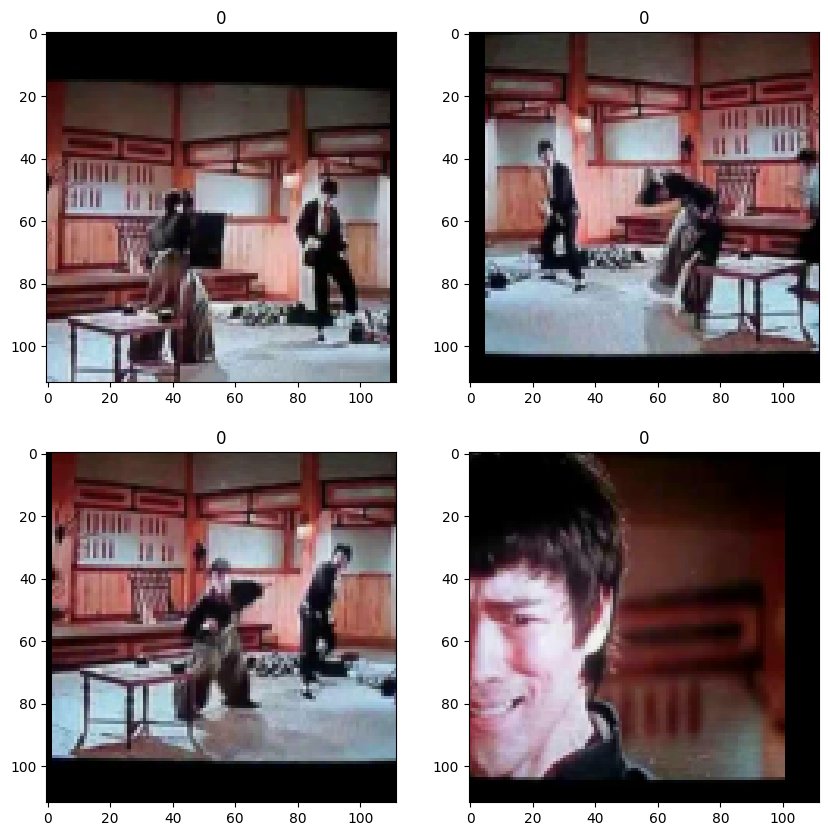

In [ ]:
plt.figure(figsize=(10,10))
for ii,img in enumerate(imgs[::4]):
    plt.subplot(2,2,ii+1)
    plt.imshow(denormalize(img, mean, std))
    plt.title(label)

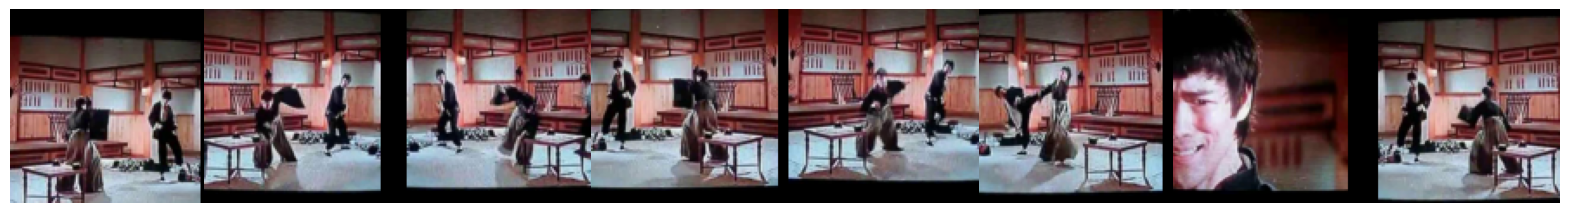

In [ ]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace=0, hspace=0)
for ii,img in enumerate(imgs[::2]):
    plt.subplot(1,8,ii+1)
    plt.imshow(denormalize(img, mean, std))
    plt.axis("off")

In [ ]:
test_transformer = transforms.Compose([
            transforms.Resize((h,w)),
            transforms.ToTensor(),
            transforms.Normalize(mean, std),
            ])
test_ds = VideoDataset(ids= test_ids, labels= test_labels, transform= test_transformer)
print(len(test_ds))

57


In [ ]:
imgs, label = test_ds[5]
imgs.shape, label, torch.min(imgs), torch.max(imgs)

(torch.Size([16, 3, 112, 112]), 4, tensor(-1.8092), tensor(2.6981))

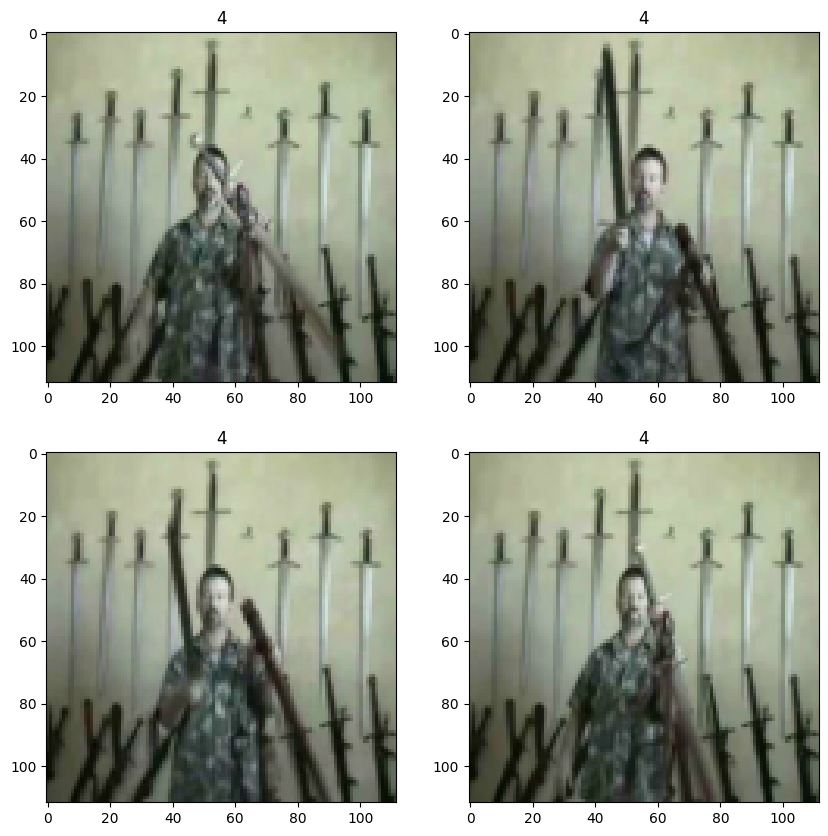

In [ ]:
plt.figure(figsize=(10,10))
for ii,img in enumerate(imgs[::4]):
    plt.subplot(2,2,ii+1)
    plt.imshow(denormalize(img, mean, std))
    plt.title(label)

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
clip_dataloader_train = DataLoader(train_ds, batch_size=8,
                        shuffle=True, num_workers=4)
clip_dataloader_test = DataLoader(test_ds, batch_size=8,
                        shuffle=False, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
class Net3D(nn.Module):

    #define the learnable paramters by calling the respective modules (nn.Conv2d, nn.MaxPool2d etc.)
    def __init__(self):
        super(Net3D, self).__init__()

        #calling conv3d module for convolution
        self.conv1 = nn.Conv3d(in_channels = 16, out_channels = 50, kernel_size = 3, stride = 2)

        #calling MaxPool3d module for max pooling with downsampling of 2
        self.pool1 = nn.MaxPool3d(kernel_size=(1, 2, 2), stride=2)

        self.conv2 =  nn.Conv3d(in_channels = 50, out_channels = 50, kernel_size = (1,3,3), stride = 2)

        self.pool2 = nn.MaxPool3d(kernel_size=(1, 3, 3), stride=2)



        #fully connected layer
        self.fc1 = nn.Linear(50*6*6, 5)


    #defining the structure of the network
    def forward(self, x):
        #Applying relu activation after each conv layer
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))


        #reshaping to 1d for giving input to fully connected units
        x = x.view(-1, 50*6*6)

        x = self.fc1(x)
        return x

fixed_model_3d = Net3D().cuda()

#Printing the network architecture
print(fixed_model_3d)


Net3D(
  (conv1): Conv3d(16, 50, kernel_size=(3, 3, 3), stride=(2, 2, 2))
  (pool1): MaxPool3d(kernel_size=(1, 2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv3d(50, 50, kernel_size=(1, 3, 3), stride=(2, 2, 2))
  (pool2): MaxPool3d(kernel_size=(1, 3, 3), stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1800, out_features=5, bias=True)
)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(fixed_model_3d.parameters(), lr=1e-2)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

In [ ]:
def train_3d(model, loss_fn, optimizer,dataloader,num_epochs = 1):
    for epoch in range(num_epochs):
        print('Starting epoch %d / %d' % (epoch + 1, num_epochs))
        check_accuracy_3d(fixed_model_3d, clip_dataloader_test)
        model.train()
        for t, sample in enumerate(dataloader):
            x_var = sample[0].cuda()
            y_var = sample[1].long().cuda()

            scores = model(x_var)

            loss = loss_fn(scores, y_var)
            if (t + 1) % print_every == 0:
                print('t = %d, loss = %.4f' % (t + 1, loss.data.item()))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        scheduler.step()

def check_accuracy_3d(model, loader):
    num_correct = 0
    num_samples = 0
    model.eval() # Put the model in test mode (the opposite of model.train(), essentially)
    for t, sample in enumerate(loader):
        x_var = sample[0].cuda()
        y_var = sample[1]
        y_var=y_var.cpu()
        scores = model(x_var)
        _, preds = scores.data.cpu().max(1)

        num_correct += (preds.numpy() == y_var.numpy()).sum()
        num_samples += preds.size(0)
    acc = float(num_correct) / num_samples
    print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))

In [ ]:
fixed_model_3d.train()
print_every = 20
train_3d(fixed_model_3d, loss_fn, optimizer,clip_dataloader_train, num_epochs=10)
fixed_model_3d.eval()
check_accuracy_3d(fixed_model_3d, clip_dataloader_train)
check_accuracy_3d(fixed_model_3d, clip_dataloader_test)

Starting epoch 1 / 10
Got 9 / 57 correct (15.79)
t = 20, loss = 1.5856
t = 40, loss = 1.5422
t = 60, loss = 1.3560
Starting epoch 2 / 10
Got 24 / 57 correct (42.11)
t = 20, loss = 1.3068
t = 40, loss = 1.3988
t = 60, loss = 1.2513
Starting epoch 3 / 10
Got 30 / 57 correct (52.63)
t = 20, loss = 0.9519
t = 40, loss = 1.1459
t = 60, loss = 1.2108
Starting epoch 4 / 10
Got 33 / 57 correct (57.89)
t = 20, loss = 1.4354
t = 40, loss = 1.0918
t = 60, loss = 1.6159
Starting epoch 5 / 10
Got 35 / 57 correct (61.40)
t = 20, loss = 1.0125
t = 40, loss = 0.6747
t = 60, loss = 0.9367
Starting epoch 6 / 10
Got 30 / 57 correct (52.63)
t = 20, loss = 0.7263
t = 40, loss = 0.5959
t = 60, loss = 0.5384
Starting epoch 7 / 10
Got 36 / 57 correct (63.16)
t = 20, loss = 0.8605
t = 40, loss = 0.7790
t = 60, loss = 1.3548
Starting epoch 8 / 10
Got 40 / 57 correct (70.18)
t = 20, loss = 1.1682
t = 40, loss = 0.5459
t = 60, loss = 0.9450
Starting epoch 9 / 10
Got 40 / 57 correct (70.18)
t = 20, loss = 0.6816
t

In [ ]:
import pickle

In [ ]:
import joblib

In [ ]:
filename = 'joblib-model.sav'
joblib.dump(fixed_model_3d, filename)

['joblib-model.sav']

In [ ]:
fixed_model_3d.cpu()

Net3D(
  (conv1): Conv3d(16, 50, kernel_size=(3, 3, 3), stride=(2, 2, 2))
  (pool1): MaxPool3d(kernel_size=(1, 2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv3d(50, 50, kernel_size=(1, 3, 3), stride=(2, 2, 2))
  (pool2): MaxPool3d(kernel_size=(1, 3, 3), stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1800, out_features=5, bias=True)
)

In [ ]:
filename = 'model.sav'
pickle.dump(fixed_model_3d, open(filename, 'wb'))

# Exercise
- Repeat experiments with number of frames as 8 and 20
- Click a clip of you smiling, upload the clip and test the clip with the above model

In [ ]:
sub_folder_jpg_8 = "lab5_data_jpg_8"
sub_folder_jpg_20 = "lab5_data_jpg_20"

### 8 Frames per video

In [ ]:
n_frames = 8
for root, dirs, files in os.walk(path2aCatgs, topdown=False):
    for name in files:
        if extension not in name:
            continue
        path2vid = os.path.join(root, name)
        frames, vlen = get_frames(path2vid, n_frames= n_frames)
        path2store = path2vid.replace(sub_folder, sub_folder_jpg_8)
        path2store = path2store.replace(extension, "")
        print(path2store)
        os.makedirs(path2store, exist_ok= True)
        store_frames(frames, path2store)
    print("-"*50)

./lab5_data_jpg_8/catch/Torwarttraining_catch_f_cm_np1_ba_bad_8
./lab5_data_jpg_8/catch/Frisbee_catch_f_cm_np1_fr_bad_2
./lab5_data_jpg_8/catch/Torwarttraining_3_(_sterreich)_catch_f_nm_np1_le_med_1
./lab5_data_jpg_8/catch/Handball_Passtraining_in_der_Zweiergruppe_(1)_catch_f_cm_np1_le_med_0
./lab5_data_jpg_8/catch/Faith_Rewarded_catch_f_cm_np1_fr_med_10
./lab5_data_jpg_8/catch/Torwarttraining_catch_f_cm_np1_ba_bad_9
./lab5_data_jpg_8/catch/Torwarttraining_catch_f_cm_np1_le_bad_5
./lab5_data_jpg_8/catch/Seldin_Lipovic_-_Willi_Weber__Torwarttraining__catch_f_cm_np1_le_med_1
./lab5_data_jpg_8/catch/How_to_Play_Wide_Receiver_in_Football_-_How_to_Catch_a_High_Ball_in_Football_catch_f_nm_np1_ri_goo_0
./lab5_data_jpg_8/catch/Torwarttraining_3_(_sterreich)_catch_f_nm_np1_fr_med_5
./lab5_data_jpg_8/catch/How_to_Pass_in_Basketball_catch_f_cm_np1_le_bad_0
./lab5_data_jpg_8/catch/Florian_Fromlowitz_beim_Training_der_U_21_Nationalmannschaft_catch_f_cm_np1_ri_med_4
./lab5_data_jpg_8/catch/Frisbee_c

In [ ]:
path2ajpgs= "lab5_data_jpg_8/"
all_vids_8, all_labels_8, catgs_8 = get_vids(path2ajpgs)
len(all_vids_8), len(all_labels_8), len(catgs_8)

(564, 564, 5)

In [ ]:
num_classes =5
unique_ids = [id_ for id_, label in zip(all_vids_8,all_labels_8) if labels_dict[label]<num_classes]
unique_labels = [label for id_, label in zip(all_vids_8,all_labels_8) if labels_dict[label]<num_classes]
len(unique_ids),len(unique_labels)

(564, 564)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
#Provides train/test indices to split data in train/test sets.
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.1, random_state=0)
train_indx, test_indx = next(sss.split(unique_ids, unique_labels))

train_ids = [unique_ids[ind] for ind in train_indx]
train_labels = [unique_labels[ind] for ind in train_indx]
print(len(train_ids), len(train_labels))

test_ids = [unique_ids[ind] for ind in test_indx]
test_labels = [unique_labels[ind] for ind in test_indx]
print(len(test_ids), len(test_labels))

507 507
57 57


In [ ]:
train_ids[:5], train_labels[:5]

(['lab5_data_jpg_8/catch/Fangen_und_Werfen_catch_u_nm_np1_fr_bad_0',
  'lab5_data_jpg_8/kick/Two_Towers_6_kick_f_cm_np1_ba_bad_7',
  'lab5_data_jpg_8/draw_sword/Muso_Jikiden_Eishinryu_in_Guldental_draw_sword_f_cm_np1_ba_med_2',
  'lab5_data_jpg_8/catch/Goalkeeper_Training_Day_#_7_catch_f_cm_np1_ri_med_0',
  'lab5_data_jpg_8/hit/Destruction_of_a_TV_hit_f_cm_np1_ri_bad_2'],
 ['catch', 'kick', 'draw_sword', 'catch', 'hit'])

In [ ]:
test_ids[:5], test_labels[:5]

(['lab5_data_jpg_8/hit/When_It_s_Nice_Out_hit_f_cm_np1_le_bad_0',
  'lab5_data_jpg_8/kick/The_Matrix_Revolutions_6_kick_f_cm_np1_ba_med_7',
  'lab5_data_jpg_8/hit/Baseball_Bat_V_S__Computer_Monitor_hit_f_cm_np1_ri_bad_0',
  'lab5_data_jpg_8/hit/RomeEpisode1_hit_u_nm_np1_fr_bad_2',
  'lab5_data_jpg_8/smile/Re-_Show_your_Smile!_2_smile_h_nm_np1_fr_goo_0'],
 ['hit', 'kick', 'hit', 'hit', 'smile'])

In [ ]:
from torch.utils.data import Dataset, DataLoader, Subset
import glob
from PIL import Image
import random

class VideoDataset(Dataset):
    def __init__(self, ids, labels, transform):
        self.transform = transform
        self.ids = ids
        self.labels = labels
    def __len__(self):
        return len(self.ids)
    def __getitem__(self, idx):
        path2imgs=glob.glob(self.ids[idx]+"/*.jpg")
        path2imgs = path2imgs[:timesteps]
        label = labels_dict[self.labels[idx]]
        frames = []
        for p2i in path2imgs:
            frame = Image.open(p2i)
            frames.append(frame)


        frames_tr = []
        for frame in frames:
            frame = self.transform(frame)
            frames_tr.append(frame)
        if len(frames_tr)>0:
            frames_tr = torch.stack(frames_tr)
        return frames_tr, label

In [ ]:
import torchvision.transforms as transforms
h, w = 112, 112
mean = [0.43216, 0.394666, 0.37645]
std = [0.22803, 0.22145, 0.216989]
train_transformer = transforms.Compose([
            transforms.Resize((h,w)),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomAffine(degrees=0, translate=(0.1,0.1)),
            transforms.ToTensor(),
            transforms.Normalize(mean, std),
            ])

In [ ]:
timesteps = n_frames
train_ds = VideoDataset(ids= train_ids, labels= train_labels, transform= train_transformer)
print(len(train_ds))

507


In [ ]:
imgs, label = train_ds[10]
imgs.shape, label, torch.min(imgs), torch.max(imgs)

(torch.Size([8, 3, 112, 112]), 1, tensor(-1.8952), tensor(2.1314))

In [ ]:
test_transformer = transforms.Compose([
            transforms.Resize((h,w)),
            transforms.ToTensor(),
            transforms.Normalize(mean, std),
            ])
test_ds = VideoDataset(ids= test_ids, labels= test_labels, transform= test_transformer)
print(len(test_ds))

57


In [ ]:
imgs, label = test_ds[5]
imgs.shape, label, torch.min(imgs), torch.max(imgs)

(torch.Size([8, 3, 112, 112]), 3, tensor(-1.8952), tensor(2.8194))

In [ ]:
clip_dataloader_train = DataLoader(train_ds, batch_size=8,
                        shuffle=True, num_workers=4)
clip_dataloader_test = DataLoader(test_ds, batch_size=8,
                        shuffle=False, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
class Net3D(nn.Module):

    #define the learnable paramters by calling the respective modules (nn.Conv2d, nn.MaxPool2d etc.)
    def __init__(self):
        super(Net3D, self).__init__()

        #calling conv3d module for convolution
        self.conv1 = nn.Conv3d(in_channels = 8, out_channels = 50, kernel_size = 3, stride = 2)

        #calling MaxPool3d module for max pooling with downsampling of 2
        self.pool1 = nn.MaxPool3d(kernel_size=(1, 2, 2), stride=2)

        self.conv2 =  nn.Conv3d(in_channels = 50, out_channels = 50, kernel_size = (1,3,3), stride = 2)

        self.pool2 = nn.MaxPool3d(kernel_size=(1, 3, 3), stride=2)



        #fully connected layer
        self.fc1 = nn.Linear(50*6*6, 5)


    #defining the structure of the network
    def forward(self, x):
        #Applying relu activation after each conv layer
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))


        #reshaping to 1d for giving input to fully connected units
        x = x.view(-1, 50*6*6)

        x = self.fc1(x)
        return x

fixed_model_3d = Net3D().cuda()

#Printing the network architecture
print(fixed_model_3d)


Net3D(
  (conv1): Conv3d(8, 50, kernel_size=(3, 3, 3), stride=(2, 2, 2))
  (pool1): MaxPool3d(kernel_size=(1, 2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv3d(50, 50, kernel_size=(1, 3, 3), stride=(2, 2, 2))
  (pool2): MaxPool3d(kernel_size=(1, 3, 3), stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1800, out_features=5, bias=True)
)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(fixed_model_3d.parameters(), lr=1e-2)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

In [ ]:
fixed_model_3d.train()
print_every = 20
train_3d(fixed_model_3d, loss_fn, optimizer,clip_dataloader_train, num_epochs=10)
fixed_model_3d.eval()
check_accuracy_3d(fixed_model_3d, clip_dataloader_train)
check_accuracy_3d(fixed_model_3d, clip_dataloader_test)

Starting epoch 1 / 10
Got 10 / 57 correct (17.54)
t = 20, loss = 1.6479
t = 40, loss = 1.3959
t = 60, loss = 1.3336
Starting epoch 2 / 10
Got 19 / 57 correct (33.33)
t = 20, loss = 1.0340
t = 40, loss = 0.9233
t = 60, loss = 1.0913
Starting epoch 3 / 10
Got 33 / 57 correct (57.89)
t = 20, loss = 0.9580
t = 40, loss = 0.8366
t = 60, loss = 0.8773
Starting epoch 4 / 10
Got 27 / 57 correct (47.37)
t = 20, loss = 1.0322
t = 40, loss = 1.1562
t = 60, loss = 1.2668
Starting epoch 5 / 10
Got 36 / 57 correct (63.16)
t = 20, loss = 0.5668
t = 40, loss = 0.8297
t = 60, loss = 1.0357
Starting epoch 6 / 10
Got 31 / 57 correct (54.39)
t = 20, loss = 1.1633
t = 40, loss = 0.6186
t = 60, loss = 0.8102
Starting epoch 7 / 10
Got 35 / 57 correct (61.40)
t = 20, loss = 0.6790
t = 40, loss = 1.0318
t = 60, loss = 0.6355
Starting epoch 8 / 10
Got 33 / 57 correct (57.89)
t = 20, loss = 0.5788
t = 40, loss = 1.0517
t = 60, loss = 0.5542
Starting epoch 9 / 10
Got 35 / 57 correct (61.40)
t = 20, loss = 0.6192


### 20 Frames per video

In [ ]:
n_frames = 20
for root, dirs, files in os.walk(path2aCatgs, topdown=False):
    for name in files:
        if extension not in name:
            continue
        path2vid = os.path.join(root, name)
        frames, vlen = get_frames(path2vid, n_frames= n_frames)
        path2store = path2vid.replace(sub_folder, sub_folder_jpg_20)
        path2store = path2store.replace(extension, "")
        print(path2store)
        os.makedirs(path2store, exist_ok= True)
        store_frames(frames, path2store)
    print("-"*50)

./lab5_data_jpg_20/catch/Torwarttraining_catch_f_cm_np1_ba_bad_8
./lab5_data_jpg_20/catch/Frisbee_catch_f_cm_np1_fr_bad_2
./lab5_data_jpg_20/catch/Torwarttraining_3_(_sterreich)_catch_f_nm_np1_le_med_1
./lab5_data_jpg_20/catch/Handball_Passtraining_in_der_Zweiergruppe_(1)_catch_f_cm_np1_le_med_0
./lab5_data_jpg_20/catch/Faith_Rewarded_catch_f_cm_np1_fr_med_10
./lab5_data_jpg_20/catch/Torwarttraining_catch_f_cm_np1_ba_bad_9
./lab5_data_jpg_20/catch/Torwarttraining_catch_f_cm_np1_le_bad_5
./lab5_data_jpg_20/catch/Seldin_Lipovic_-_Willi_Weber__Torwarttraining__catch_f_cm_np1_le_med_1
./lab5_data_jpg_20/catch/How_to_Play_Wide_Receiver_in_Football_-_How_to_Catch_a_High_Ball_in_Football_catch_f_nm_np1_ri_goo_0
./lab5_data_jpg_20/catch/Torwarttraining_3_(_sterreich)_catch_f_nm_np1_fr_med_5
./lab5_data_jpg_20/catch/How_to_Pass_in_Basketball_catch_f_cm_np1_le_bad_0
./lab5_data_jpg_20/catch/Florian_Fromlowitz_beim_Training_der_U_21_Nationalmannschaft_catch_f_cm_np1_ri_med_4
./lab5_data_jpg_20/ca

In [ ]:
path2ajpgs= "lab5_data_jpg_20/"
all_vids_20, all_labels_20, catgs_20 = get_vids(path2ajpgs)
len(all_vids_20), len(all_labels_20), len(catgs_20)

(564, 564, 5)

In [ ]:
num_classes =5
unique_ids = [id_ for id_, label in zip(all_vids_20,all_labels_20) if labels_dict[label]<num_classes]
unique_labels = [label for id_, label in zip(all_vids_20,all_labels_20) if labels_dict[label]<num_classes]
len(unique_ids),len(unique_labels)

(564, 564)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
#Provides train/test indices to split data in train/test sets.
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.1, random_state=0)
train_indx, test_indx = next(sss.split(unique_ids, unique_labels))

train_ids = [unique_ids[ind] for ind in train_indx]
train_labels = [unique_labels[ind] for ind in train_indx]
print(len(train_ids), len(train_labels))

test_ids = [unique_ids[ind] for ind in test_indx]
test_labels = [unique_labels[ind] for ind in test_indx]
print(len(test_ids), len(test_labels))

507 507
57 57


In [ ]:
train_ids[:5], train_labels[:5]

(['lab5_data_jpg_20/catch/Fangen_und_Werfen_catch_u_nm_np1_fr_bad_0',
  'lab5_data_jpg_20/kick/Two_Towers_6_kick_f_cm_np1_ba_bad_7',
  'lab5_data_jpg_20/draw_sword/Muso_Jikiden_Eishinryu_in_Guldental_draw_sword_f_cm_np1_ba_med_2',
  'lab5_data_jpg_20/catch/Goalkeeper_Training_Day_#_7_catch_f_cm_np1_ri_med_0',
  'lab5_data_jpg_20/hit/Destruction_of_a_TV_hit_f_cm_np1_ri_bad_2'],
 ['catch', 'kick', 'draw_sword', 'catch', 'hit'])

In [ ]:
test_ids[:5], test_labels[:5]

(['lab5_data_jpg_20/hit/When_It_s_Nice_Out_hit_f_cm_np1_le_bad_0',
  'lab5_data_jpg_20/kick/The_Matrix_Revolutions_6_kick_f_cm_np1_ba_med_7',
  'lab5_data_jpg_20/hit/Baseball_Bat_V_S__Computer_Monitor_hit_f_cm_np1_ri_bad_0',
  'lab5_data_jpg_20/hit/RomeEpisode1_hit_u_nm_np1_fr_bad_2',
  'lab5_data_jpg_20/smile/Re-_Show_your_Smile!_2_smile_h_nm_np1_fr_goo_0'],
 ['hit', 'kick', 'hit', 'hit', 'smile'])

In [ ]:
from torch.utils.data import Dataset, DataLoader, Subset
import glob
from PIL import Image
import random

class VideoDataset(Dataset):
    def __init__(self, ids, labels, transform):
        self.transform = transform
        self.ids = ids
        self.labels = labels
    def __len__(self):
        return len(self.ids)
    def __getitem__(self, idx):
        path2imgs=glob.glob(self.ids[idx]+"/*.jpg")
        path2imgs = path2imgs[:timesteps]
        label = labels_dict[self.labels[idx]]
        frames = []
        for p2i in path2imgs:
            frame = Image.open(p2i)
            frames.append(frame)


        frames_tr = []
        for frame in frames:
            frame = self.transform(frame)
            frames_tr.append(frame)
        if len(frames_tr)>0:
            frames_tr = torch.stack(frames_tr)
        return frames_tr, label

In [ ]:
import torchvision.transforms as transforms
h, w = 112, 112
mean = [0.43216, 0.394666, 0.37645]
std = [0.22803, 0.22145, 0.216989]
train_transformer = transforms.Compose([
            transforms.Resize((h,w)),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomAffine(degrees=0, translate=(0.1,0.1)),
            transforms.ToTensor(),
            transforms.Normalize(mean, std),
            ])

In [ ]:
timesteps = n_frames
train_ds = VideoDataset(ids= train_ids, labels= train_labels, transform= train_transformer)
print(len(train_ds))

507


In [ ]:
imgs, label = train_ds[10]
imgs.shape, label, torch.min(imgs), torch.max(imgs)

(torch.Size([20, 3, 112, 112]), 1, tensor(-1.8952), tensor(2.6804))

In [ ]:
test_transformer = transforms.Compose([
            transforms.Resize((h,w)),
            transforms.ToTensor(),
            transforms.Normalize(mean, std),
            ])
test_ds = VideoDataset(ids= test_ids, labels= test_labels, transform= test_transformer)
print(len(test_ds))

In [ ]:
imgs, label = test_ds[5]
imgs.shape, label, torch.min(imgs), torch.max(imgs)

(torch.Size([20, 3, 112, 112]), 3, tensor(-1.8952), tensor(2.8375))

In [ ]:
clip_dataloader_train = DataLoader(train_ds, batch_size=8,
                        shuffle=True, num_workers=4)
clip_dataloader_test = DataLoader(test_ds, batch_size=8,
                        shuffle=False, num_workers=4)

In [ ]:
class Net3D(nn.Module):

    #define the learnable paramters by calling the respective modules (nn.Conv2d, nn.MaxPool2d etc.)
    def __init__(self):
        super(Net3D, self).__init__()

        #calling conv3d module for convolution
        self.conv1 = nn.Conv3d(in_channels = 20, out_channels = 50, kernel_size = 3, stride = 2)

        #calling MaxPool3d module for max pooling with downsampling of 2
        self.pool1 = nn.MaxPool3d(kernel_size=(1, 2, 2), stride=2)

        self.conv2 =  nn.Conv3d(in_channels = 50, out_channels = 50, kernel_size = (1,3,3), stride = 2)

        self.pool2 = nn.MaxPool3d(kernel_size=(1, 3, 3), stride=2)



        #fully connected layer
        self.fc1 = nn.Linear(50*6*6, 5)


    #defining the structure of the network
    def forward(self, x):
        #Applying relu activation after each conv layer
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))


        #reshaping to 1d for giving input to fully connected units
        x = x.view(-1, 50*6*6)

        x = self.fc1(x)
        return x

fixed_model_3d = Net3D().cuda()

#Printing the network architecture
print(fixed_model_3d)


Net3D(
  (conv1): Conv3d(20, 50, kernel_size=(3, 3, 3), stride=(2, 2, 2))
  (pool1): MaxPool3d(kernel_size=(1, 2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv3d(50, 50, kernel_size=(1, 3, 3), stride=(2, 2, 2))
  (pool2): MaxPool3d(kernel_size=(1, 3, 3), stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1800, out_features=5, bias=True)
)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(fixed_model_3d.parameters(), lr=1e-2)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

In [ ]:
def check_accuracy_3ds(model, loader):
    num_correct = 0
    num_samples = 0
    model.eval() # Put the model in test mode (the opposite of model.train(), essentially)
    for t, sample in enumerate(loader):
        x_var = sample[0].cuda()
        print(x_var)
        y_var = sample[1]
        y_var=y_var.cpu()
        scores = model(x_var)
        _, preds = scores.data.cpu().max(1)

        num_correct += (preds.numpy() == y_var.numpy()).sum()
        num_samples += preds.size(0)
    acc = float(num_correct) / num_samples
    print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))

In [ ]:
fixed_model_3d.train()
print_every = 20
train_3d(fixed_model_3d, loss_fn, optimizer,clip_dataloader_train, num_epochs=10)
fixed_model_3d.eval()
check_accuracy_3d(fixed_model_3d, clip_dataloader_train)
check_accuracy_3d(fixed_model_3d, clip_dataloader_test)

Starting epoch 1 / 10
Got 11 / 57 correct (19.30)
t = 20, loss = 1.2377
t = 40, loss = 1.3270
t = 60, loss = 1.7369
Starting epoch 2 / 10
Got 30 / 57 correct (52.63)
t = 20, loss = 1.1048
t = 40, loss = 1.3118
t = 60, loss = 1.4356
Starting epoch 3 / 10
Got 36 / 57 correct (63.16)
t = 20, loss = 1.3439
t = 40, loss = 0.6366
t = 60, loss = 1.2420
Starting epoch 4 / 10
Got 29 / 57 correct (50.88)
t = 20, loss = 1.3162
t = 40, loss = 0.7301
t = 60, loss = 0.9925
Starting epoch 5 / 10
Got 24 / 57 correct (42.11)
t = 20, loss = 0.5532
t = 40, loss = 1.4726
t = 60, loss = 0.9123
Starting epoch 6 / 10
Got 33 / 57 correct (57.89)
t = 20, loss = 0.8346
t = 40, loss = 0.9061
t = 60, loss = 0.5550
Starting epoch 7 / 10
Got 35 / 57 correct (61.40)
t = 20, loss = 0.4569
t = 40, loss = 0.9982
t = 60, loss = 0.2773
Starting epoch 8 / 10
Got 37 / 57 correct (64.91)
t = 20, loss = 0.9867
t = 40, loss = 0.9101
t = 60, loss = 0.6207
Starting epoch 9 / 10
Got 35 / 57 correct (61.40)
t = 20, loss = 0.9086


### Testing the smile video taken

In [ ]:
# !unzip lab5_2_smile.zip

Archive:  lab5_2_smile.zip
   creating: lab5_2_smile/
   creating: lab5_2_smile/smile/
  inflating: lab5_2_smile/smile/smile_vid.mp4  


In [ ]:
import os

path2data = "./"
sub_folder = "lab5_2_smile"
sub_folder_jpg = "lab5_2_smile_jpg"
path2aCatgs = os.path.join(path2data, sub_folder)

listOfCategories = os.listdir(path2aCatgs)
listOfCategories, len(listOfCategories)

(['smile'], 1)

In [ ]:
n_frames = 20
for root, dirs, files in os.walk(path2aCatgs, topdown=False):
    for name in files:
        if extension not in name:
            continue
        path2vid = os.path.join(root, name)
        frames, vlen = get_frames(path2vid, n_frames= n_frames)
        path2store = path2vid.replace(sub_folder, sub_folder_jpg)
        path2store = path2store.replace(extension, "")
        print(path2store)
        os.makedirs(path2store, exist_ok= True)
        store_frames(frames, path2store)
    print("-"*50)

--------------------------------------------------
--------------------------------------------------


In [ ]:
frames, vlen = get_frames('/content/smile_vid.mp4', n_frames= 20)

In [ ]:
len(frames)

21

In [ ]:
vlen

182

In [ ]:
test_transformer2 = transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize((h,w)),
            transforms.ToTensor(),
            transforms.Normalize(mean, std),
            ])
# test_ds = VideoDataset(ids= test_ids, labels= test_labels, transform= test_transformer)

In [ ]:
frames_tr = []
for frame in frames:
    # frame= torch.from_numpy(frame)
    frame = test_transformer2(torch.Tensor(frame).transpose(0,2))
    frames_tr.append(frame)
if len(frames_tr)>0:
    frames_tr = torch.stack(frames_tr)

In [ ]:
frames_tr.shape

torch.Size([21, 3, 112, 112])

In [ ]:
fr=frames_tr.transpose(1,3)

In [ ]:
fixed_model_3d(frames_tr[:-1].view(1,20,3,112,112).cuda())

tensor([[-0.0828, -2.4794,  0.9022,  2.5092, -1.3884]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [ ]:
{'catch': 0, 'kick': 1, 'smile': 2, 'draw_sword': 3, 'hit': 4}